In [60]:
# Librerías

import math 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

[[ 1.00000000e-02  1.00000000e-02  0.00000000e+00  0.00000000e+00]
 [ 9.98001202e-03 -4.98985084e-02  1.16606200e-04  3.24820351e-01]
 [ 9.90062725e-03 -1.08526263e-01  6.47274487e-04  7.33936180e-01]
 ...
 [-1.95024382e-10 -2.62014953e-07  1.53113479e-09  1.83035002e-06]
 [-4.55887419e-10 -2.52672593e-07  3.35115341e-09  1.76050549e-06]
 [-7.04307157e-10 -2.36352807e-07  5.07965218e-09  1.64204283e-06]]


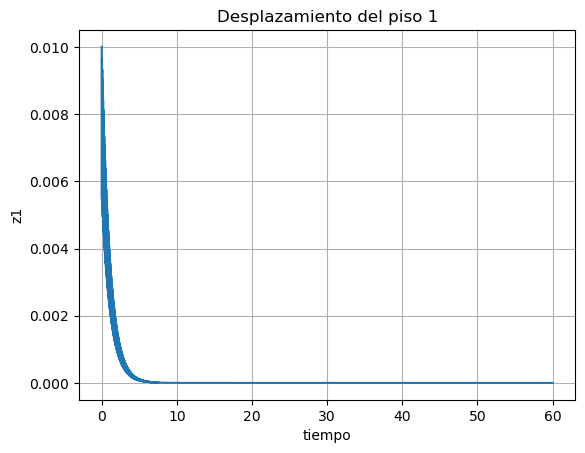

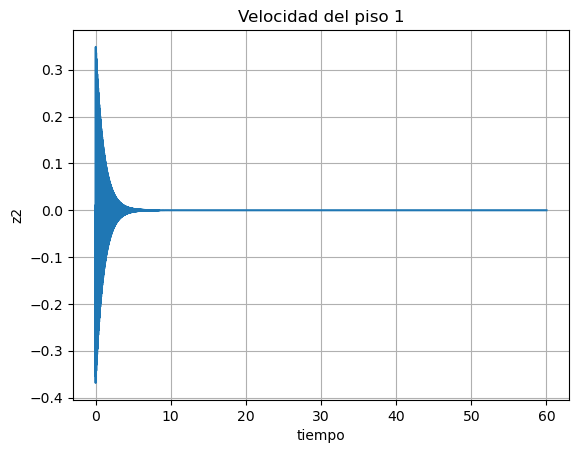

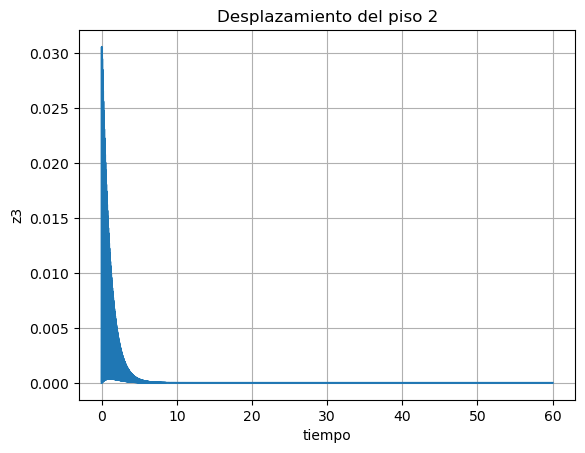

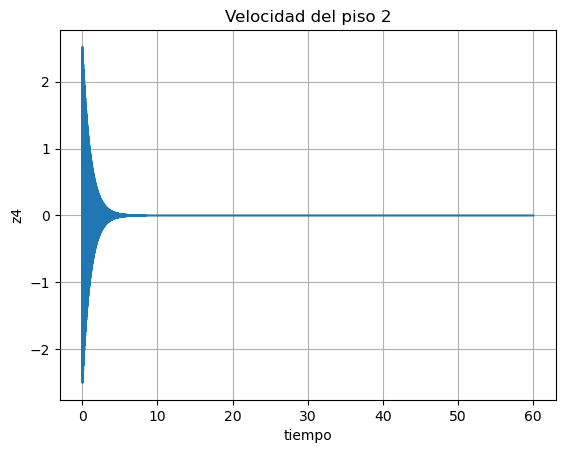

In [2]:
# Parametros del edificio

# Constante de restitución del edificio
k1 = 3e6 # Piso 1
k2 = 3e6 # Piso 2
k3 = 3e6 # Piso 3

# Masas de los pisos 
m1 = 1000 # Piso 1 en kilogramos
m2 = 1000 # Piso 2 en kilogramos
m3 = 1000 # Piso 3 en kilogramos

# Ganancias del Controlador
g1 = 200000
g2 = 700000
g3 = 300000
g4 = 100000
g5 = 100000
g6 = 100000

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3

t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
# las x's son las z's
def f(x,t):
    w = -g1*x[0]-g2*x[1]-g3*x[2]-g4*x[3] # control virtual
    u = m2*((2*k2/m2)*x[2]-(k1/m2)*x[0]+w) #control real
    dx_dt = [0,0,0,0] # vector z'
    dx_dt[0] = x[1] 
    dx_dt[1] = -(k1/m1)*x[0]-(k2/m1)*(x[0]-x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2*k2/m2)*x[2]+(k1/m2)*x[0]+(1/m2)*u
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0 = [0.01,0.01,0,0, 0,0],t=t)
print(Sol)

# Graficar los estados 
plt.plot(t,Sol[:,0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()
plt.show()

plt.plot(t,Sol[:,1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()
plt.show()


plt.plot(t,Sol[:,2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()
plt.show()

plt.plot(t,Sol[:,3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()
plt.show()

In [ ]:
def f(x,t):
    b = 1
    w = -g1*x[0]-g2*x[1]-g3*x[2]-g4*x[3] - g5*x[4] - g6*x[5] # control virtual
    u = m3/b * ((-k3*x[2] / m3) + (k3 *x[4] / m3) + w) #control real
    
    dx_dt = [0,0,0,0,0,0] # vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -((k1+k2) / m1)*x[0] + k2*x[2] / m1
    dx_dt[2] = x[3]
    dx_dt[3] = (k2*x[0]) / m2 + ((-(k2+k3)*x[2]) / m2) + (k3*x[4] / m2)
    dx_dt[4] = x[5] 
    dx_dt[5] = (k3*x[2] / m3) - (k3*x[4] / m3) + (b*u / m3)
    
    return dx_dt

[[ 1.00000000e-02  1.00000000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.97998606e-03 -4.99548557e-02  1.49964153e-05  2.99398861e-02
  -1.09860491e-05 -1.39527727e-02]
 [ 9.90020040e-03 -1.09520481e-01  5.97647059e-05  5.95088016e-02
  -2.78329385e-05 -1.96915081e-02]
 ...
 [-3.86445917e-03  5.68419792e-01  3.11631649e-03 -2.06508045e-02
  -1.54345904e-03 -2.06748568e-01]
 [-3.28036214e-03  5.99170287e-01  3.07842119e-03 -5.49065824e-02
  -1.73923400e-03 -1.84792967e-01]
 [-2.66737085e-03  6.26163320e-01  3.00702647e-03 -8.75915347e-02
  -1.91306720e-03 -1.62905159e-01]]


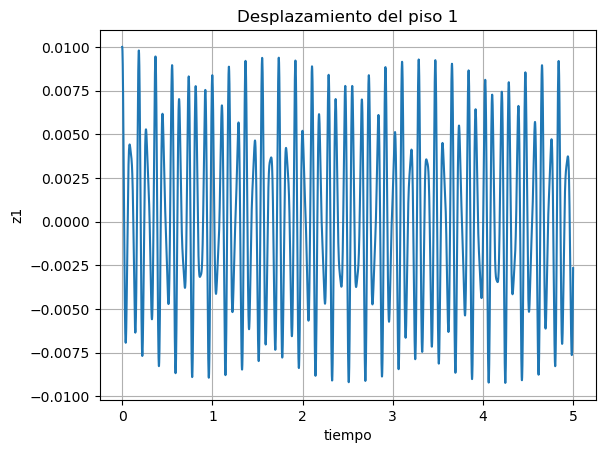

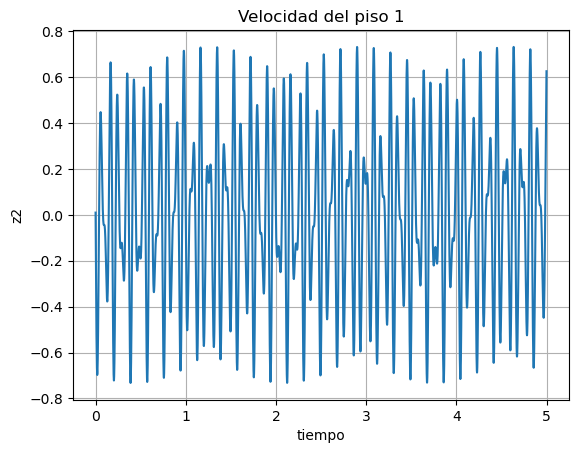

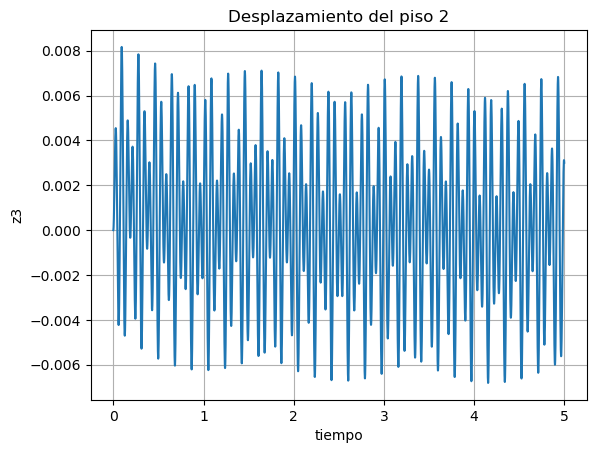

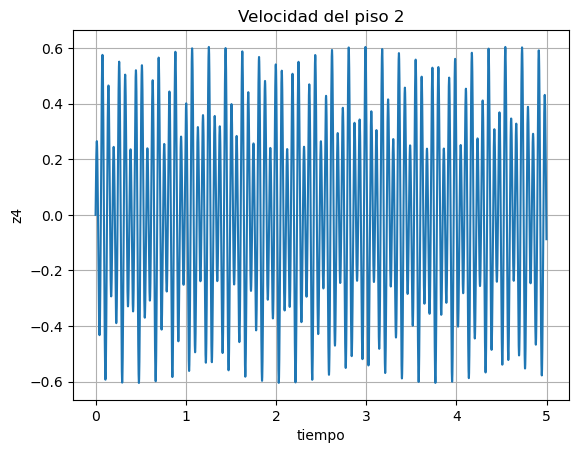

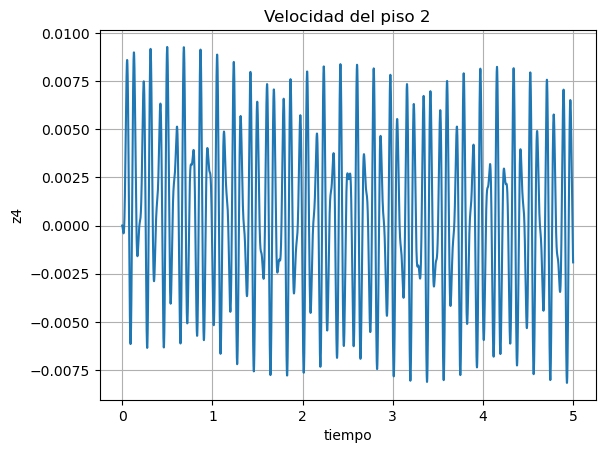

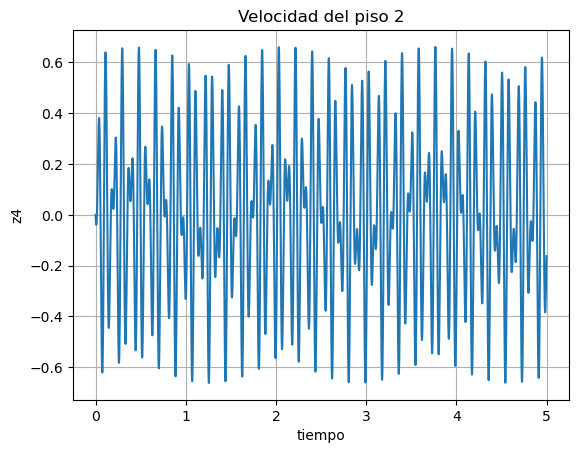

In [11]:
# Parametros del edificio

# Constante de restitución del edificio
k1 = 3e6 # Piso 1
k2 = 3e6 # Piso 2
k3 = 3e6 # Piso 3

# Masas de los pisos 
m1 = 1000 # Piso 1 en kilogramos
m2 = 1000 # Piso 2 en kilogramos
m3 = 1000 # Piso 3 en kilogramos

# Ganancias del Controlador
g1 = 2e6  # Incrementado
g2 = 2e6  # Reducido
g3 = 5e6  # Incrementado
g4 = 5e6  # Incrementado
g5 = 5e6  # Incrementado
g6 = 5e6  # Incrementado

# Vector de tiempo de simulación
start = 0
stop = 5
step = 1e-3

t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
# las x's son las z's
def f(x,t):
    b = 1
    w = -g1*x[0]-g2*x[1]-g3*x[2]-g4*x[3] - g5*x[4] - g6*x[5] # control virtual
    u = m3/b * ((-k3*x[2] / m3) + (k3 *x[4] / m3) + w) #control real
    
    dx_dt = [0,0,0,0,0,0] # vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -((k1+k2) / m1)*x[0] + k2*x[2] / m1
    dx_dt[2] = x[3]
    dx_dt[3] = (k2*x[0]) / m2 + ((-(k2+k3)*x[2]) / m2) + (k3*x[4] / m2)
    dx_dt[4] = x[5] 
    dx_dt[5] = (k3*x[2] / m3) - (k3*x[4] / m3) + (b*u / m3)
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0 = [0.01,0.01,0,0, 0,0],t=t)
print(Sol)

# Graficar los estados 
plt.plot(t,Sol[:,0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()
plt.show()

plt.plot(t,Sol[:,1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()
plt.show()


plt.plot(t,Sol[:,2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()
plt.show()

plt.plot(t,Sol[:,3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()
plt.show()

plt.plot(t,Sol[:,4])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()
plt.show()

plt.plot(t,Sol[:,5])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()
plt.show()

C:\Users\manue\AppData\Local\Temp\ipykernel_18404\3229268074.py:34: RuntimeWarning: overflow encountered in scalar multiply
  u = m3/b * ((-k3*x[2] / m3) + (k3 *x[4] / m3) + w)  # control real


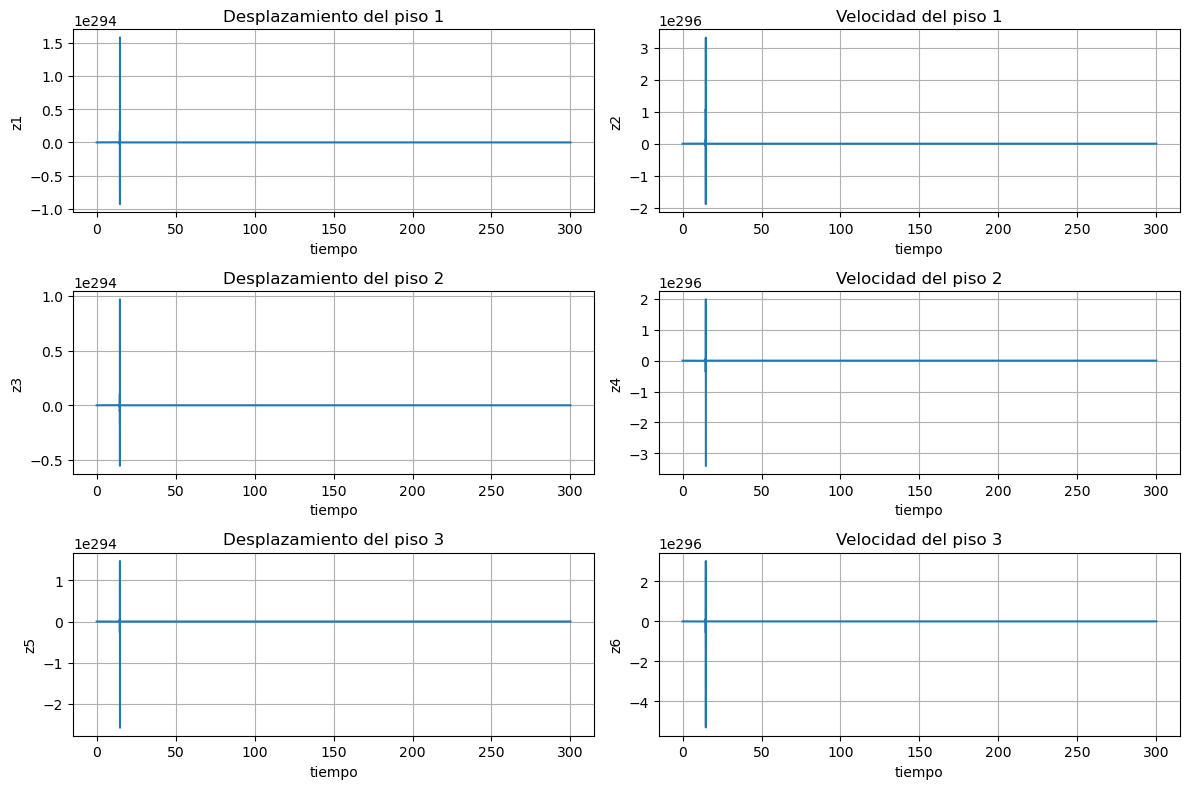

In [39]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constante de restitución del edificio
k1 = 3e9  # Piso 1
k2 = 3e9  # Piso 2
k3 = 3e9  # Piso 3

# Masas de los pisos 
m1 = 1e5  # Piso 1 en kilogramos
m2 = 1e5  # Piso 2 en kilogramos
m3 = 1e9  # Piso 3 en kilogramos

# Ganancias del Controlador ajustadas
g1 = 2e5  # Ajustado
g2 = 5e5  # Ajustado
g3 = 3e5  # Ajustado
g4 = 1e5  # Ajustado
g5 = 2e5  # Ajustado
g6 = 3e5  # Ajustado

# Vector de tiempo de simulación
start = 0
stop = 60*5
step = 1e-3

t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x,t):
    b = 1
    w = -g1*x[0]-g2*x[1]-g3*x[2]-g4*x[3] - g5*x[4] - g6*x[5]  # control virtual
    u = m3/b * ((-k3*x[2] / m3) + (k3 *x[4] / m3) + w)  # control real
    
    dx_dt = [0, 0, 0, 0, 0, 0]  # vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -((k1+k2) / m1)*x[0] + k2*x[2] / m1
    dx_dt[2] = x[3]
    dx_dt[3] = (k2*x[0]) / m2 + ((-(k2+k3)*x[2]) / m2) + (k3*x[4] / m2)
    dx_dt[4] = x[5] 
    dx_dt[5] = (k3*x[2] / m3) - (k3*x[4] / m3) + (b*u / m3)
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0=[0.01, 0.01, 0, 0, 0, 0], t=t)

# Graficar los estados
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.tight_layout()
plt.show()


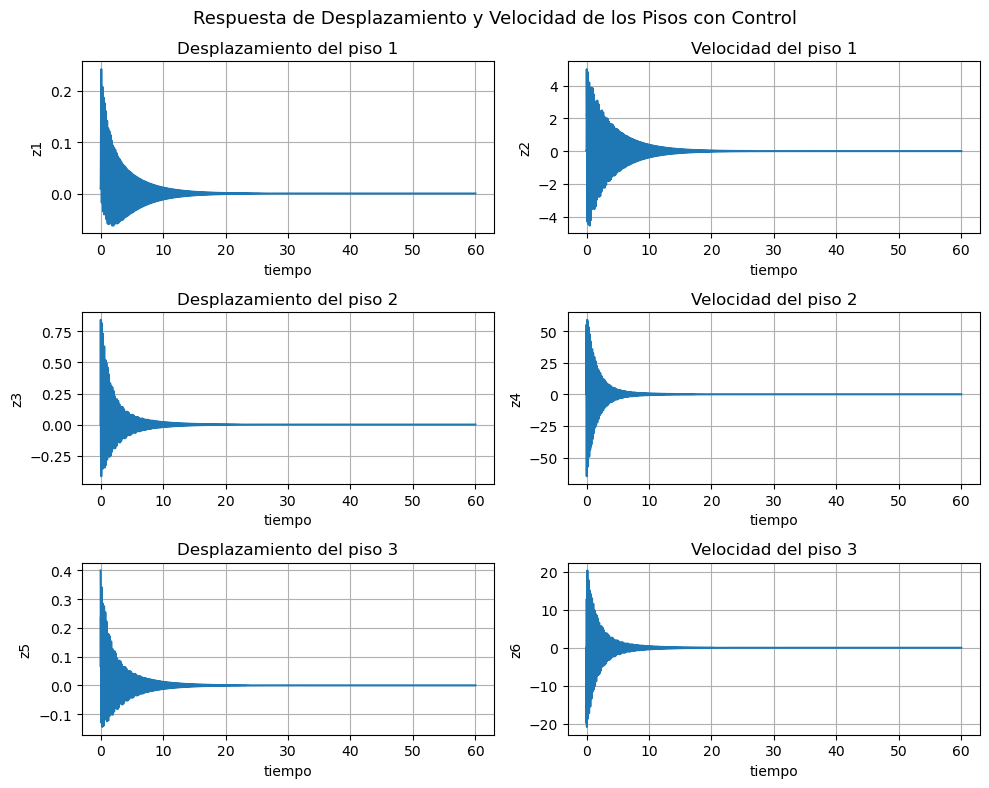

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constante de restitución del edificio
k1 = 3e6  # Piso 1
k2 = 3e6  # Piso 2
k3 = 3e6  # Piso 2

# Masas de los pisos 
m1 = 10000  # Piso 1 en kilogramos
m2 = 1000  # Piso 2 en kilogramos
m3 = 10000  # Piso 3 en kilogramos

# Ganancias del Controlador ajustadas
g1 = 2e5  # Ajustado
g2 = 5e5  # Ajustado
g3 = 3e5  # Ajustado
g4 = 1e5  # Ajustado
g5 = 2e5  # Ajustado
g6 = 3e5  # Ajustado

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3

t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x, t):
    w = -g1 * x[0] - g2 * x[1] - g3 * x[2] - g4 * x[3] - g5 * x[4] - g6 * x[5]  # control virtual
    u = m2 * ((2 * k2 / m2) * x[2] - (k1 / m2) * x[0] + w)  # control real
    dx_dt = [0, 0, 0, 0, 0, 0]  # vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -(k1 / m1) * x[0] - (k2 / m1) * (x[0] - x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2 * k2 / m2) * x[2] + (k1 / m2) * x[0] + (1 / m2) * u
    dx_dt[4] = x[5]
    dx_dt[5] = -(k1 / m2) * x[4] - (k2 / m2) * (x[4] - x[2])
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0=[0.01, 0.01, 0, 0.2, 0.4, 0], t=t)

# Graficar los estados
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.suptitle('Respuesta de Desplazamiento y Velocidad de los Pisos con Control', fontsize=13)

plt.tight_layout()

plt.savefig('grafica_estados.png', dpi=300, bbox_inches='tight')

plt.show()

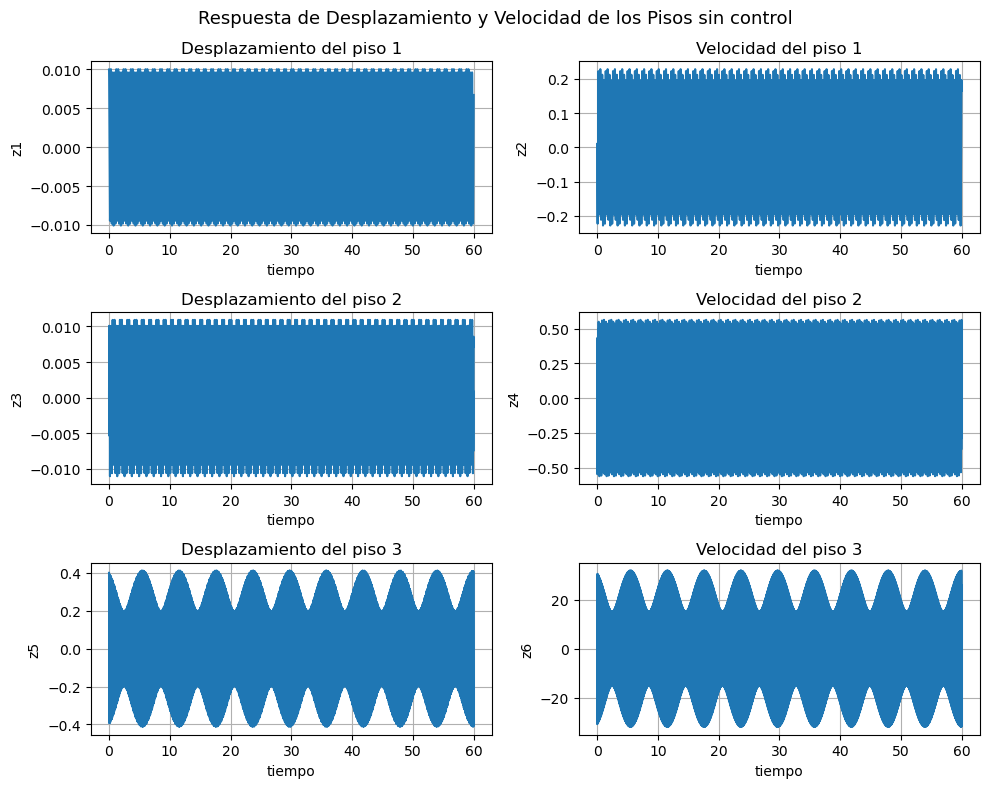

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constante de restitución del edificio
k1 = 3e6  # Piso 1
k2 = 3e6  # Piso 2
k3 = 3e6  # Piso 2

# Masas de los pisos 
m1 = 10000  # Piso 1 en kilogramos
m2 = 1000  # Piso 2 en kilogramos
m3 = 10000  # Piso 3 en kilogramos

# Ganancias del Controlador ajustadas
g1 = 2e5  # Ajustado
g2 = 5e5  # Ajustado
g3 = 3e5  # Ajustado
g4 = 1e5  # Ajustado
g5 = 2e5  # Ajustado
g6 = 3e5  # Ajustado

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3

t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x, t):
    w = -g1 * x[0] - g2 * x[1] - g3 * x[2] - g4 * x[3] - g5 * x[4] - g6 * x[5]  # control virtual
    #u = m2 * ((2 * k2 / m2) * x[2] - (k1 / m2) * x[0] + w)  # control real
    u = 0
    dx_dt = [0, 0, 0, 0, 0, 0]  # vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -(k1 / m1) * x[0] - (k2 / m1) * (x[0] - x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2 * k2 / m2) * x[2] + (k1 / m2) * x[0] + (1 / m2) * u
    dx_dt[4] = x[5]
    dx_dt[5] = -(k1 / m2) * x[4] - (k2 / m2) * (x[4] - x[2])
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0=[0.01, 0.01, 0, 0.2, 0.4, 0], t=t)

# Graficar los estados
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.suptitle('Respuesta de Desplazamiento y Velocidad de los Pisos sin control', fontsize=13)

plt.tight_layout()

plt.savefig('grafica_estados_sincontrol.png', dpi=300, bbox_inches='tight')

plt.show()

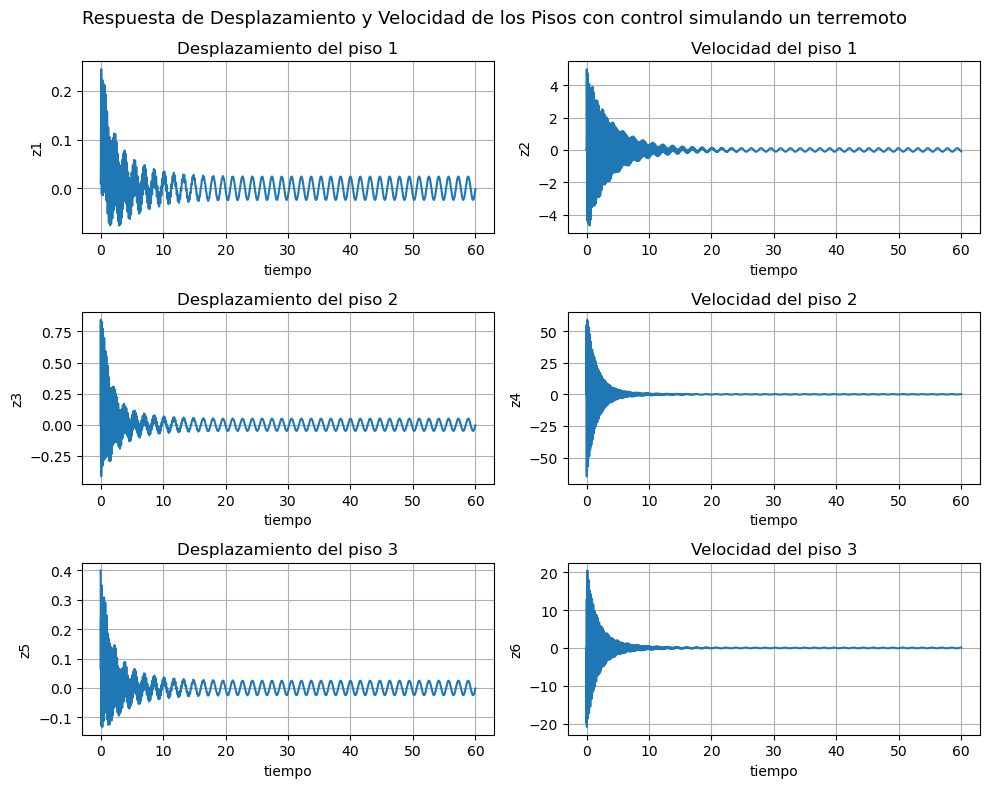

In [61]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constante de restitución del edificio
k1 = 3e6  # Piso 1
k2 = 3e6  # Piso 2
k3 = 3e6  # Piso 2

# Masas de los pisos 
m1 = 10000  # Piso 1 en kilogramos
m2 = 1000  # Piso 2 en kilogramos
m3 = 10000  # Piso 3 en kilogramos

# Ganancias del Controlador ajustadas
g1 = 2e5  # Ajustado
g2 = 5e5  # Ajustado
g3 = 3e5  # Ajustado
g4 = 1e5  # Ajustado
g5 = 2e5  # Ajustado
g6 = 3e5  # Ajustado

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3

t = np.arange(start, stop, step)
l = 4
A = 0.2

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x, t):
    w = -g1 * x[0] - g2 * x[1] - g3 * x[2] - g4 * x[3] - g5 * x[4] - g6 * x[5]  # control virtual
    u = m2 * ((2 * k2 / m2) * x[2] - (k1 / m2) * x[0] + w)  # control real
    dx_dt = [0, 0, 0, 0, 0, 0]  # vector z'
    
    dx_dt[0] = x[1] + A*math.sin(t*l) # Terremoto
    
    dx_dt[1] = -(k1 / m1) * x[0] - (k2 / m1) * (x[0] - x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2 * k2 / m2) * x[2] + (k1 / m2) * x[0] + (1 / m2) * u
    dx_dt[4] = x[5]
    dx_dt[5] = -(k1 / m2) * x[4] - (k2 / m2) * (x[4] - x[2])
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0=[0.01, 0.01, 0, 0.2, 0.4, 0], t=t)

# Graficar los estados
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.suptitle('Respuesta de Desplazamiento y Velocidad de los Pisos con control simulando un terremoto', fontsize=13)

plt.tight_layout()

plt.savefig('grafica_estados_terremotocontrol.png', dpi=300, bbox_inches='tight')

plt.show()

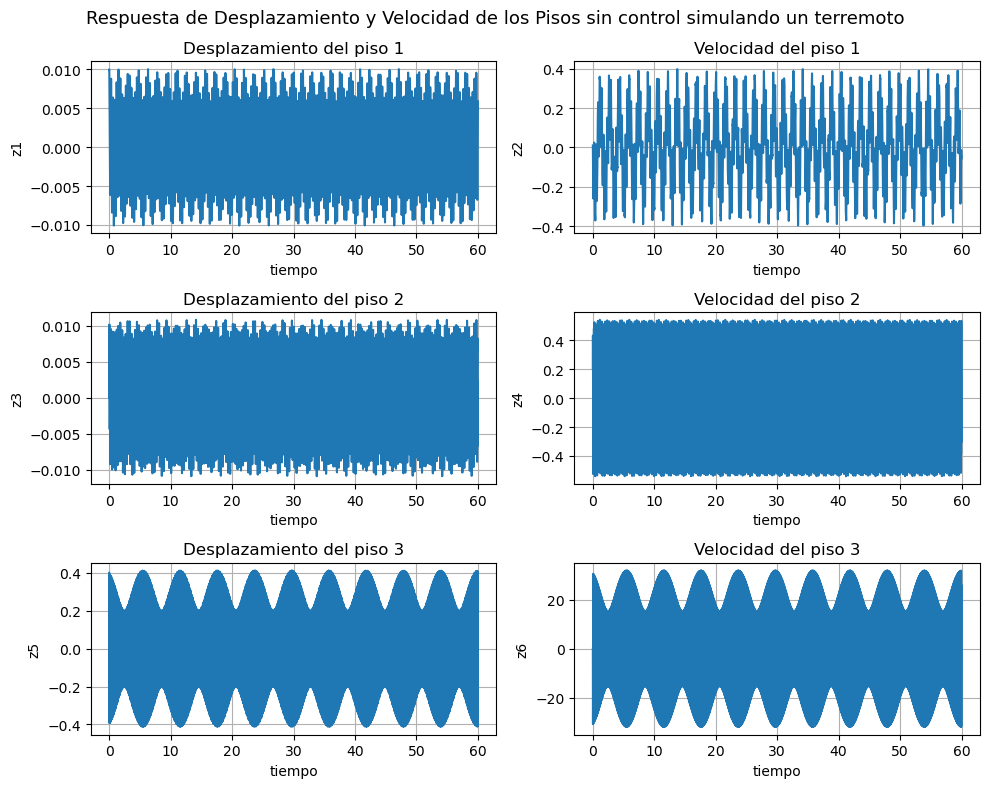

In [62]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constante de restitución del edificio
k1 = 3e6  # Piso 1
k2 = 3e6  # Piso 2
k3 = 3e6  # Piso 2

# Masas de los pisos 
m1 = 10000  # Piso 1 en kilogramos
m2 = 1000  # Piso 2 en kilogramos
m3 = 10000  # Piso 3 en kilogramos

# Ganancias del Controlador ajustadas
g1 = 2e5  # Ajustado
g2 = 5e5  # Ajustado
g3 = 3e5  # Ajustado
g4 = 1e5  # Ajustado
g5 = 2e5  # Ajustado
g6 = 3e5  # Ajustado

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3

t = np.arange(start, stop, step)
l = 4
A = 0.2

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x, t):
    w = -g1 * x[0] - g2 * x[1] - g3 * x[2] - g4 * x[3] - g5 * x[4] - g6 * x[5]  # control virtual
    #u = m2 * ((2 * k2 / m2) * x[2] - (k1 / m2) * x[0] + w)  # control real
    u = 0
    dx_dt = [0, 0, 0, 0, 0, 0]  # vector z'
    
    dx_dt[0] = x[1] + A*math.sin(t*l) # Terremoto
    
    dx_dt[1] = -(k1 / m1) * x[0] - (k2 / m1) * (x[0] - x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2 * k2 / m2) * x[2] + (k1 / m2) * x[0] + (1 / m2) * u
    dx_dt[4] = x[5]
    dx_dt[5] = -(k1 / m2) * x[4] - (k2 / m2) * (x[4] - x[2])
    
    return dx_dt

# Solución del sistema
Sol = odeint(f, y0=[0.01, 0.01, 0, 0.2, 0.4, 0], t=t)

# Graficar los estados
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.suptitle('Respuesta de Desplazamiento y Velocidad de los Pisos sin control simulando un terremoto', fontsize=13)

plt.tight_layout()

#plt.savefig('grafica_estados_terremoto_sincontrol.png', dpi=300, bbox_inches='tight')

plt.show()

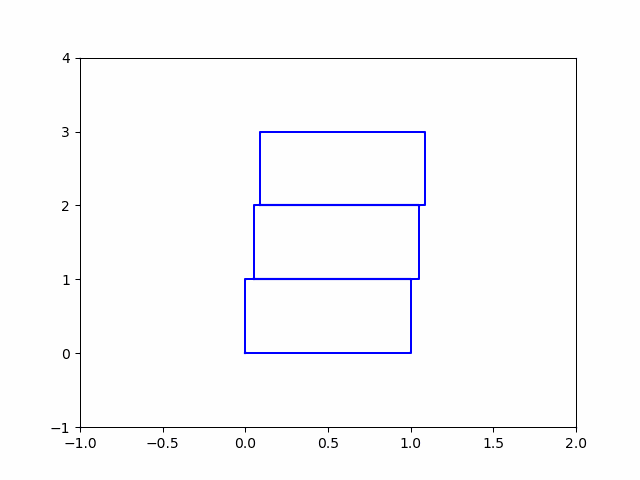

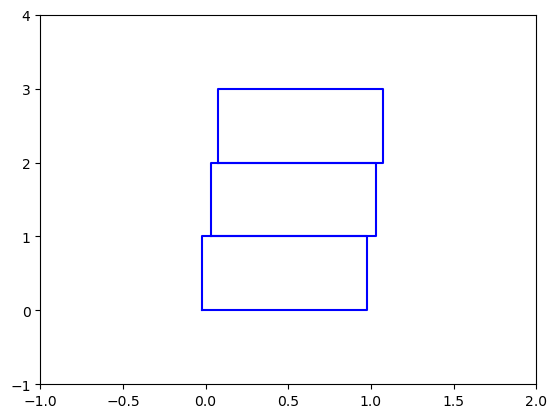

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from matplotlib.animation import FuncAnimation

# Configuración del sismo
np.random.seed(0)
num_frames = 60
amplitude = 0.1
frequency = 2

# Posición del edificio
x_building = np.array([0, 1, 1, 0, 0])
y_building = np.array([0, 0, 1, 1, 0])
floors = 3

# Crear la figura y el eje
fig, ax = plt.subplots()
ax.set_xlim(-1, 2)
ax.set_ylim(-1, floors + 1)
building_lines = []

# Dibujar los pisos
for i in range(floors):
    line, = ax.plot(x_building, y_building + i, 'b-')
    building_lines.append(line)

# Función de actualización para la animación
def update(frame):
    for i, line in enumerate(building_lines):
        phase_shift = i * np.pi / 6  # Diferente fase para cada piso
        dx = amplitude * np.sin(2 * np.pi * frequency * frame / num_frames + phase_shift)
        new_x_building = x_building + dx
        line.set_xdata(new_x_building)
    return building_lines

# Crear la animación
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Guardar la animación como GIF
ani.save('sismo_building_3pisos.gif', writer='pillow')

# Mostrar la animación en el notebook
from IPython.display import Image
Image(filename='sismo_building_3pisos.gif')


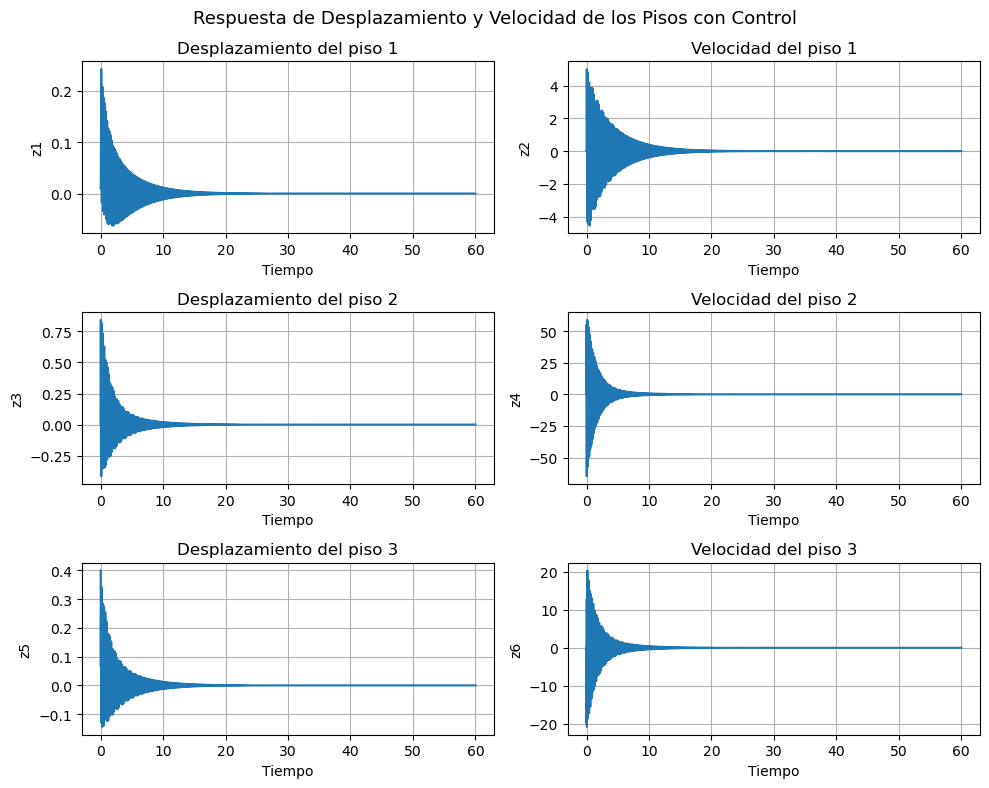

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constantes del sistema
k1 = 3e6  # Constante de restitución del piso 1
k2 = 3e6  # Constante de restitución del piso 2
k3 = 3e6  # Constante de restitución del piso 3
m1 = 10000  # Masa del piso 1 en kilogramos
m2 = 1000  # Masa del piso 2 en kilogramos
m3 = 10000  # Masa del piso 3 en kilogramos

# Ganancias del controlador ajustadas
g1 = 2e5
g2 = 5e5
g3 = 3e5
g4 = 1e5
g5 = 2e5
g6 = 3e5

# Vector de tiempo de simulación
start = 0
stop = 60
step = 1e-3
t = np.arange(start, stop, step)

# Función para el sistema de ecuaciones diferenciales (VARIABLES DE ESTADO)
def f(x, t):
    w = -g1 * x[0] - g2 * x[1] - g3 * x[2] - g4 * x[3] - g5 * x[4] - g6 * x[5]  # Control virtual
    u = m2 * ((2 * k2 / m2) * x[2] - (k1 / m2) * x[0] + w)  # Control real
    dx_dt = [0, 0, 0, 0, 0, 0]  # Vector z'
    
    dx_dt[0] = x[1] 
    dx_dt[1] = -(k1 / m1) * x[0] - (k2 / m1) * (x[0] - x[2])
    dx_dt[2] = x[3]
    dx_dt[3] = -(2 * k2 / m2) * x[2] + (k1 / m2) * x[0] + (1 / m2) * u
    dx_dt[4] = x[5]
    dx_dt[5] = -(k1 / m2) * x[4] - (k2 / m2) * (x[4] - x[2])
    
    return dx_dt

# Solución del sistema
y0 = [0.01, 0.01, 0, 0.2, 0.4, 0]  # Condiciones iniciales
Sol = odeint(f, y0, t)

# Graficar los estados
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.plot(t, Sol[:, 0])
plt.xlabel('Tiempo')
plt.ylabel('z1')
plt.title('Desplazamiento del piso 1')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, Sol[:, 1])
plt.xlabel('Tiempo')
plt.ylabel('z2')
plt.title('Velocidad del piso 1')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(t, Sol[:, 2])
plt.xlabel('Tiempo')
plt.ylabel('z3')
plt.title('Desplazamiento del piso 2')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, Sol[:, 3])
plt.xlabel('Tiempo')
plt.ylabel('z4')
plt.title('Velocidad del piso 2')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(t, Sol[:, 4])
plt.xlabel('Tiempo')
plt.ylabel('z5')
plt.title('Desplazamiento del piso 3')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(t, Sol[:, 5])
plt.xlabel('Tiempo')
plt.ylabel('z6')
plt.title('Velocidad del piso 3')
plt.grid()

plt.suptitle('Respuesta de Desplazamiento y Velocidad de los Pisos con Control', fontsize=13)
plt.tight_layout()
plt.savefig('grafica_estados.png', dpi=300, bbox_inches='tight')
plt.show()

# Crear animación del edificio moviéndose
fig, ax = plt.subplots()
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 4)

floors = 3
x_building = np.array([0, 1, 1, 0, 0])
y_building = np.array([0, 0, 1, 1, 0])
building_lines = []

# Dibujar los pisos
for i in range(floors):
    line, = ax.plot(x_building, y_building + i, 'b-')
    building_lines.append(line)

# Función de actualización para la animación
def update(frame):
    displacements = [Sol[frame, 0], Sol[frame, 2], Sol[frame, 4]]
    for i, line in enumerate(building_lines):
        new_x_building = x_building + displacements[i]
        line.set_xdata(new_x_building)
    return building_lines

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t), blit=True)

# Guardar la animación como GIF
ani.save('sismo_building_3pisos.gif', writer='pillow')

# Mostrar la animación en el notebook
from IPython.display import Image
Image(filename='sismo_building_3pisos.gif')
